# Part II Project Notebook

Notebook outlining implementation of my Part II Project

## ACCESS
> Gaining access to the data, including overcoming availability challenges (data is distributed across architectures, called from an obscure API, written in log books) as well as legal rights (for example intellectual property rights) and individual privacy rights (such as those provided by the GDPR).

Data source will be from Yahoo Finance. Using `yfinance` to easily access this data. 

Dataset consists of past 5 years of historical price data of the following companies:
- AAPL
- GOOG
- MSFT
- AMZN

In [205]:
%load_ext autoreload
%autoreload 2

In [1]:
from access import data
data("aapl")

Open        High         Low       Close  \
Date                                                                        
2018-01-02 00:00:00-05:00   40.175162   40.680421   39.962668   40.670975   
2018-01-03 00:00:00-05:00   40.734726   41.211654   40.600150   40.663895   
2018-01-04 00:00:00-05:00   40.737077   40.956654   40.628472   40.852768   
2018-01-05 00:00:00-05:00   40.949579   41.405254   40.857499   41.317898   
2018-01-08 00:00:00-05:00   41.164436   41.461924   41.065270   41.164436   
...                               ...         ...         ...         ...   
2022-12-23 00:00:00-05:00  130.026375  131.516136  128.755113  130.959961   
2022-12-27 00:00:00-05:00  130.483232  130.513026  127.841385  129.142441   
2022-12-28 00:00:00-05:00  128.784900  130.135617  125.010842  125.179680   
2022-12-29 00:00:00-05:00  127.116366  129.589368  126.858146  128.725311   
2022-12-30 00:00:00-05:00  127.533492  129.062974  126.560178  129.043106   

                              Volume  Dividends  Stock Splits  
Date                                                           
2018-01-02 00:00:00-05:00  102223600        0.0           0.0  
2018-01-03 00:00:00-05:00  118071600        0.0           0.0  
2018-01-04 00:00:00-05:00   89738400        0.0           0.0  
2018-01-05 00:00:00-05:00   94640000        0.0           0.0  
2018-01-08 00:00:00-05:00   82271200        0.0           0.0  
...                              ...        ...           ...  
2022-12-23 00:00:00-05:00   63814900        0.0           0.0  
2022-12-27 00:00:00-05:00   69007800        0.0           0.0  
2022-12-28 00:00:00-05:00   85438400        0.0           0.0  
2022-12-29 00:00:00-05:00   75703700        0.0           0.0  
2022-12-30 00:00:00-05:00   77034200        0.0           0.0  

[1259 rows x 7 columns]

We have the Close, Adjusted Close, Open, Low, High and Volume fields.

In [110]:
AAPL = data.xs('AAPL', level=1, axis=1)
GOOG = data.xs('GOOG', level=1, axis=1)
MSFT = data.xs('MSFT', level=1, axis=1)
AMZN = data.xs('AMZN', level=1, axis=1)

company_list = [AAPL, GOOG, MSFT, AMZN]

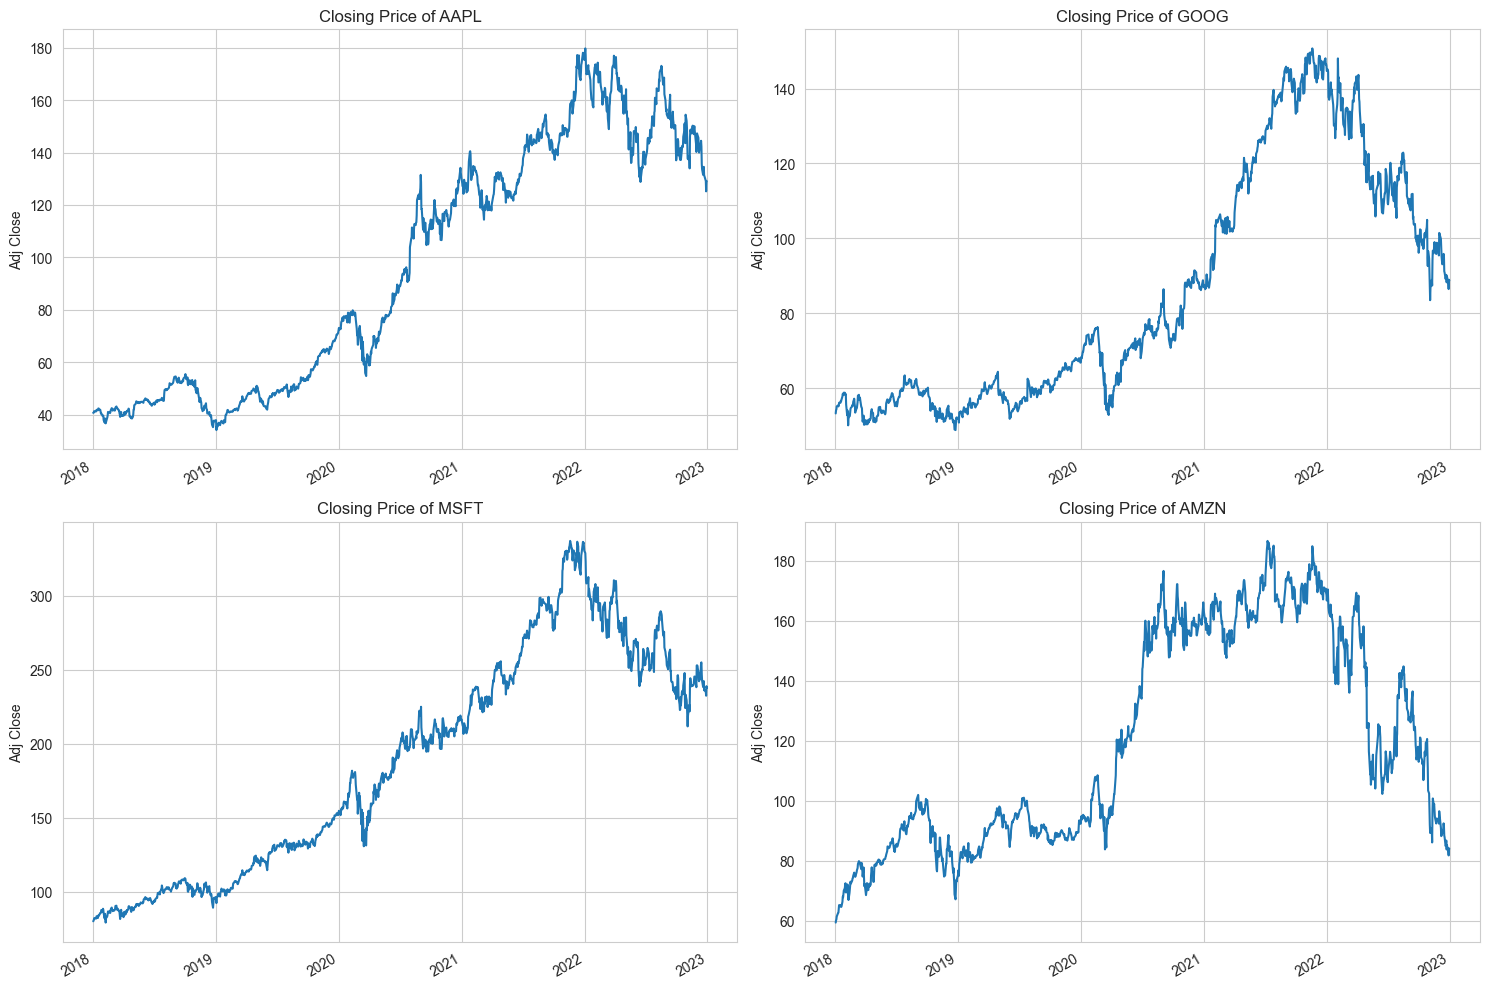

In [111]:
import matplotlib.pyplot as plt
# plt.style.use("fivethirtyeight")

# Let's see a historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list):
    plt.subplot(2, 2, i+1)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {stock_list[i]}")
    
plt.tight_layout()


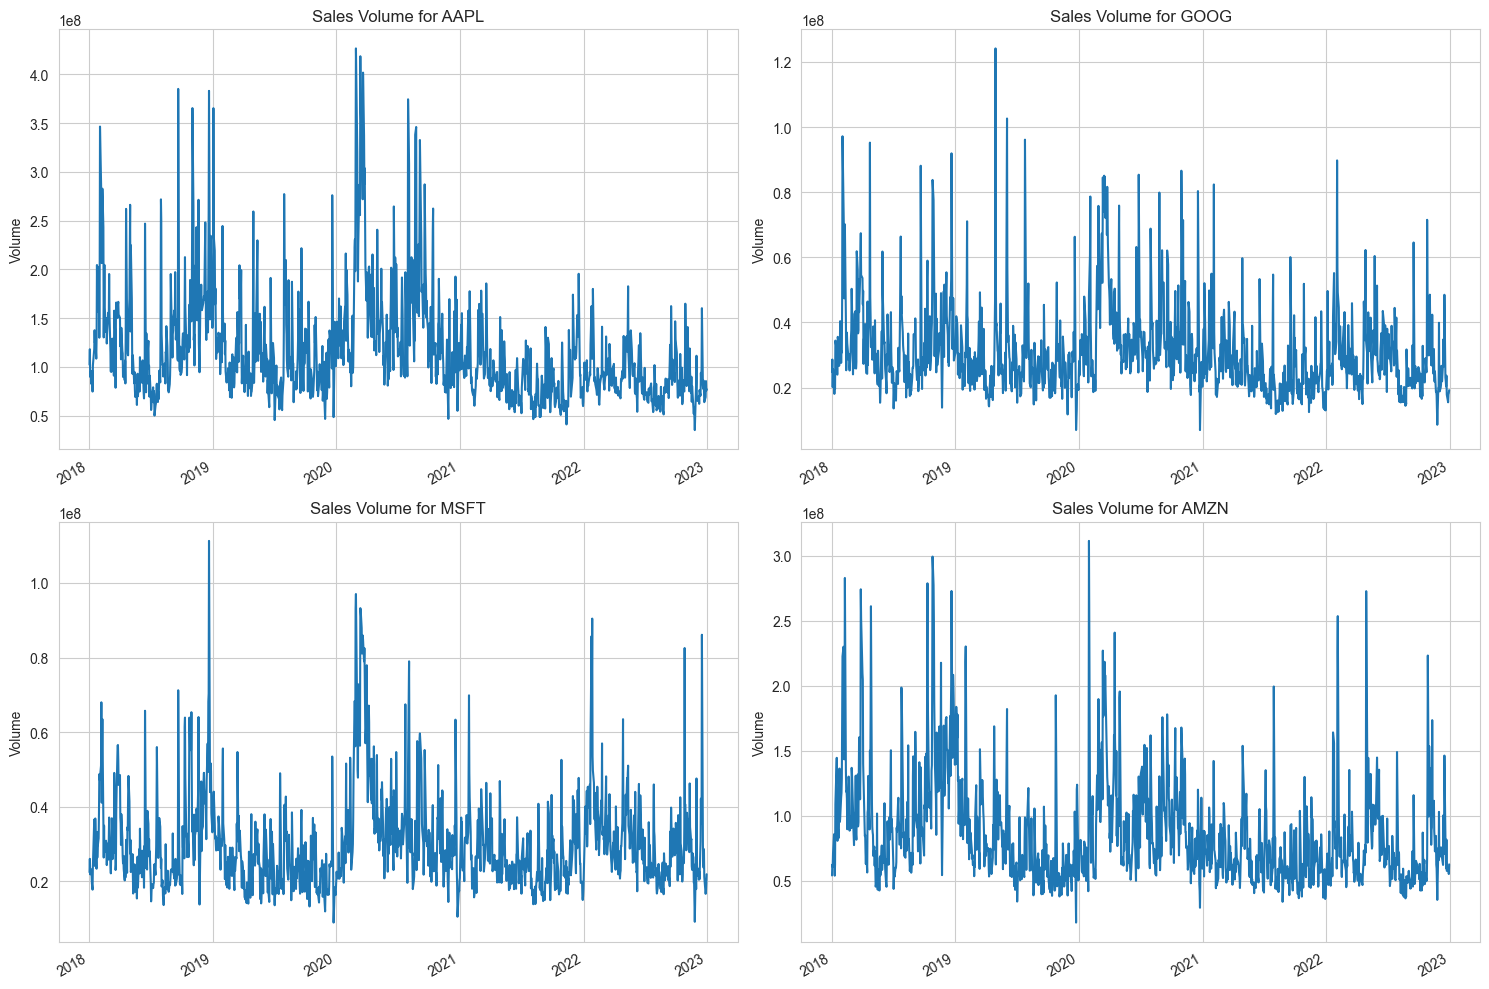

In [112]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {stock_list[i - 1]}")
    
plt.tight_layout()

## ASSESS
> Understanding what is in the data. Is it what it's purported to be, how are missing values encoded, what are the outliers, what does each variable represent and how is it encoded.

> (T)he aim in assess is to only do work that is repeatable, and make that work available to others who may also want to use the data.

*Code adapted from https://www.kaggle.com/code/faressayah/stock-market-analysis-prediction-using-lstm*

We look at:
1. change in price of the stock over time?
2. daily return of the stock on average?
3. moving average of the various stocks?
4. correlation between different stocks'?
5. how much value do we put at risk by investing in a particular stock?

Let's introduce a few additional features that we may find useful to include in our models. 

First, the Moving Average (MA), which is a common and simple technical analysis indicator. It smooths out volatility.

/var/folders/d7/ktx3dym91yjgj_gpmnfs0rh00000gn/T/ipykernel_80621/2620952860.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/d7/ktx3dym91yjgj_gpmnfs0rh00000gn/T/ipykernel_80621/2620952860.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/d7/ktx3dym91yjgj_gpmnfs0rh00000gn/T/ipykernel_80621/2620952860.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

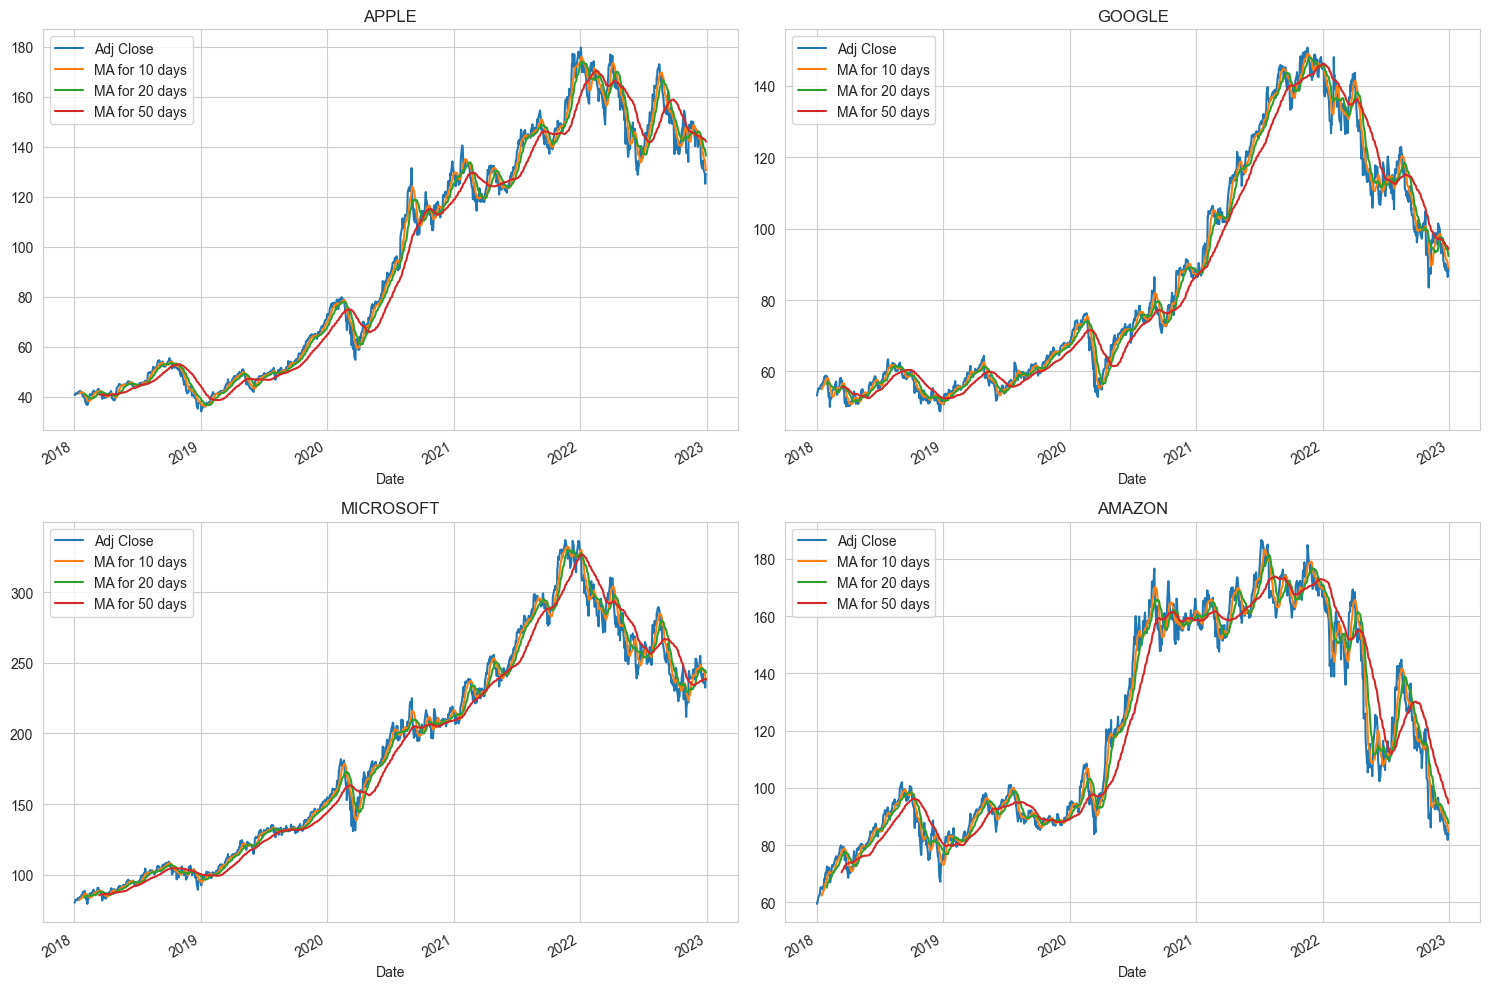

In [113]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()
        

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

We see in the graph that the best values to measure the moving average are 10 and 20 days because we still capture trends in the data without noise.

Now daily returns! Now we're now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value.

/var/folders/d7/ktx3dym91yjgj_gpmnfs0rh00000gn/T/ipykernel_80621/3236142522.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/d7/ktx3dym91yjgj_gpmnfs0rh00000gn/T/ipykernel_80621/3236142522.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/d7/ktx3dym91yjgj_gpmnfs0rh00000gn/T/ipykernel_80621/3236142522.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

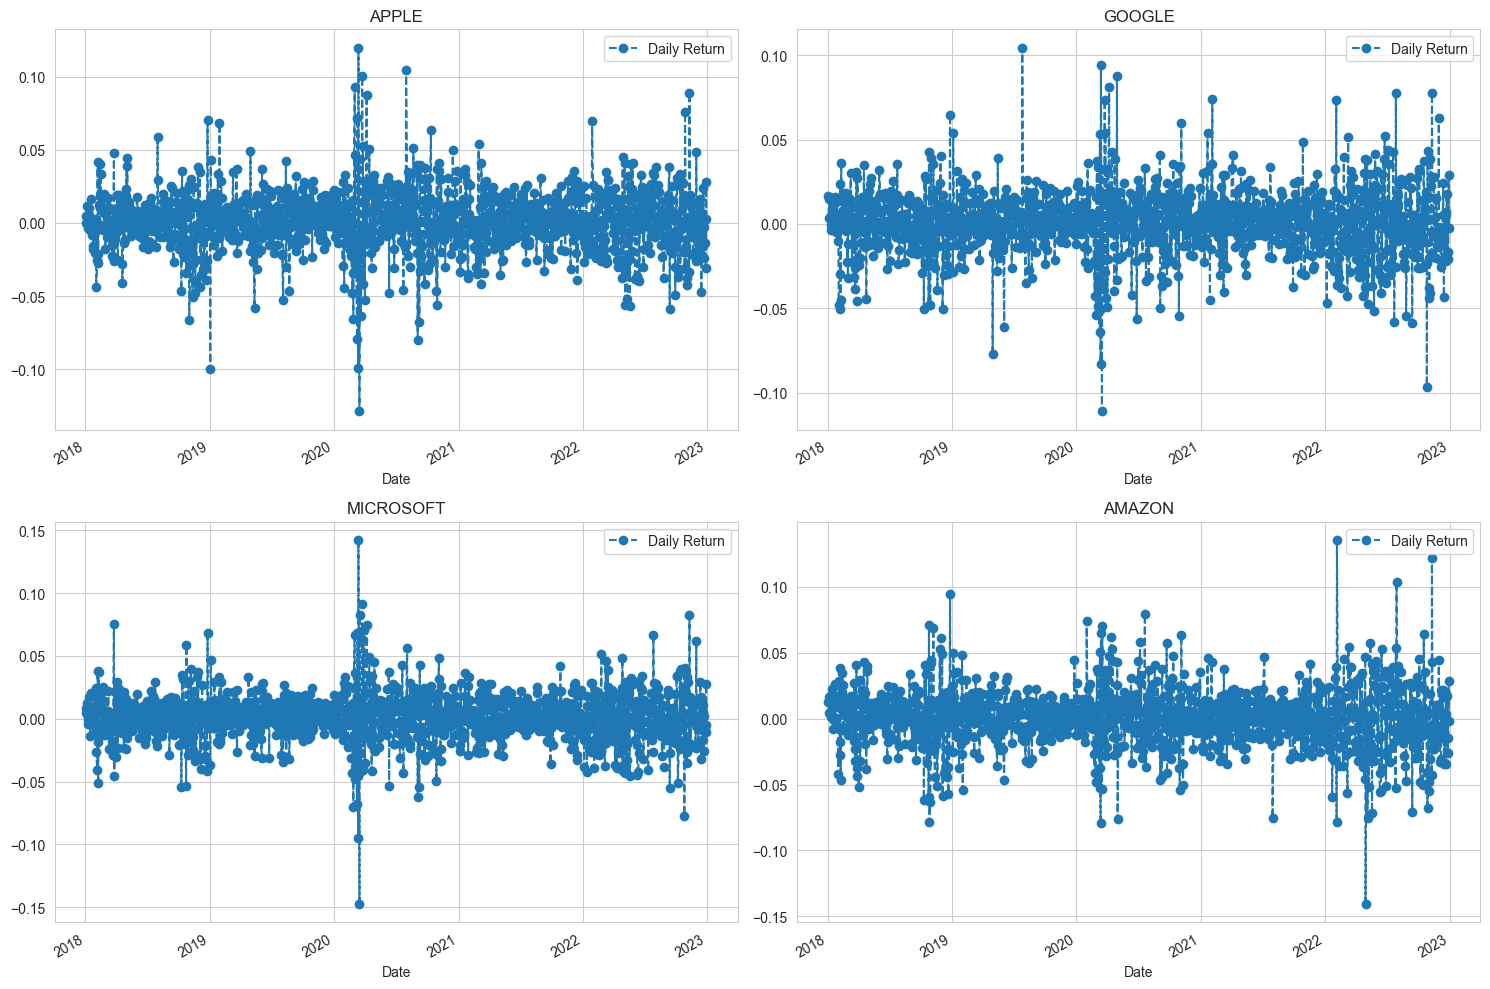

In [114]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

Now let's get an overall look at the average daily return using a histogram. We'll use seaborn to create both a histogram and kde plot on the same figure

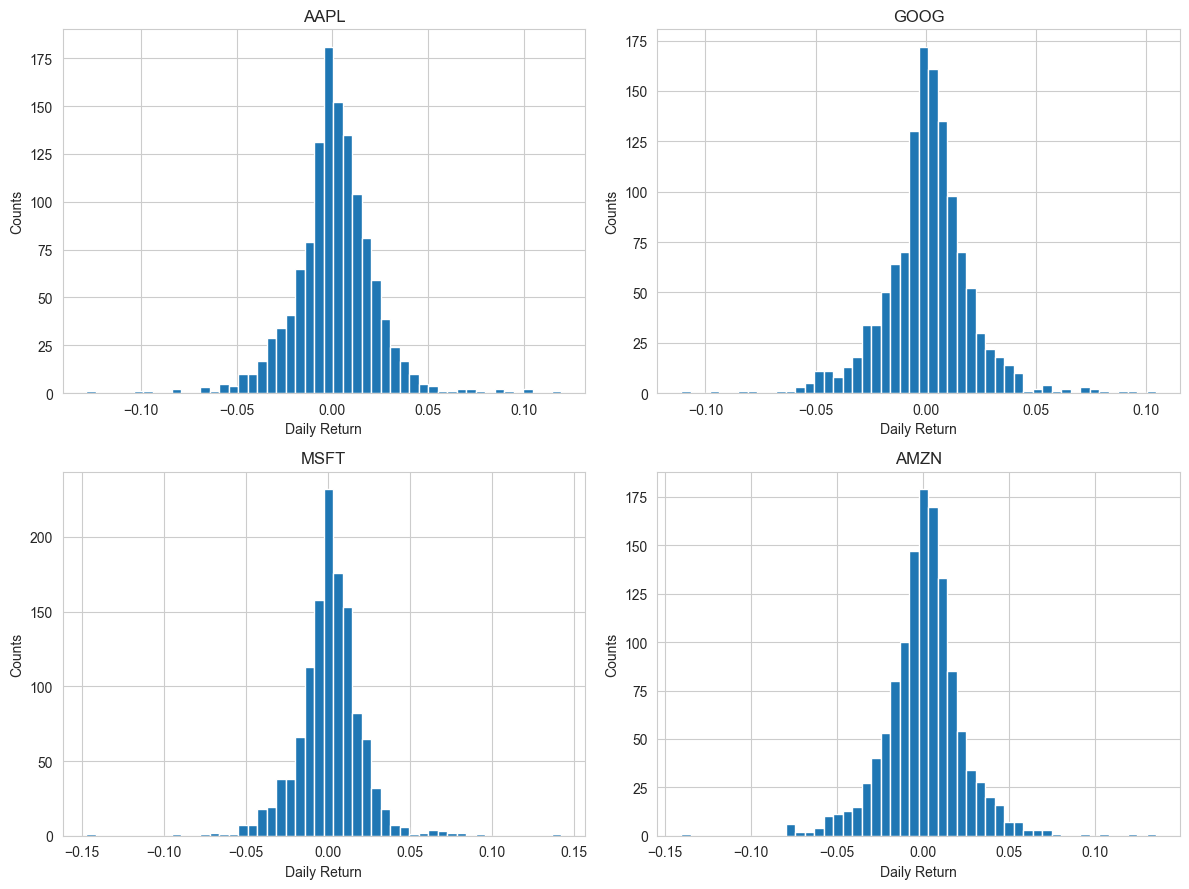

In [115]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list):
    plt.subplot(2, 2, i+1)
    company['Daily Return'].hist(bins=50)
    plt.ylabel('Counts')
    plt.xlabel("Daily Return")
    plt.title(f"{stock_list[i]}")
    
plt.tight_layout()

Now let's look at correlation between diff stock close prices.

In [116]:
# Grab all the closing prices for the tech stock list into one DataFrame

closing_df = data["Adj Close"]

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

AAPL      AMZN      GOOG      MSFT
Date                                              
2018-01-02       NaN       NaN       NaN       NaN
2018-01-03 -0.000174  0.012775  0.016413  0.004654
2018-01-04  0.004645  0.004476  0.003621  0.008802
2018-01-05  0.011385  0.016163  0.014571  0.012398
2018-01-08 -0.003715  0.014425  0.004273  0.001020

Now we can compare the daily percentage return of two stocks to check how correlated. First let's see a sotck compared to itself.

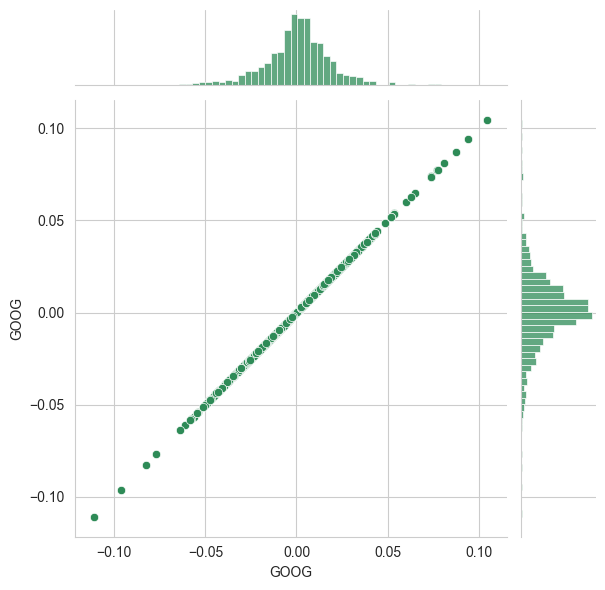

In [117]:
import seaborn as sns
sns.set_style('whitegrid')

# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind='scatter', color='seagreen')

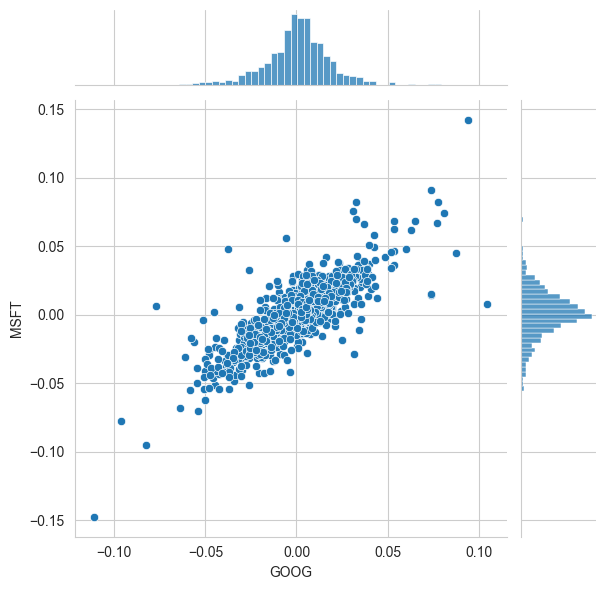

In [118]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter')

Seaborn and pandas make it very easy to repeat this comparison analysis for every possible combination of stocks in our technology stock ticker list. We can use sns.pairplot() to automatically create this plot

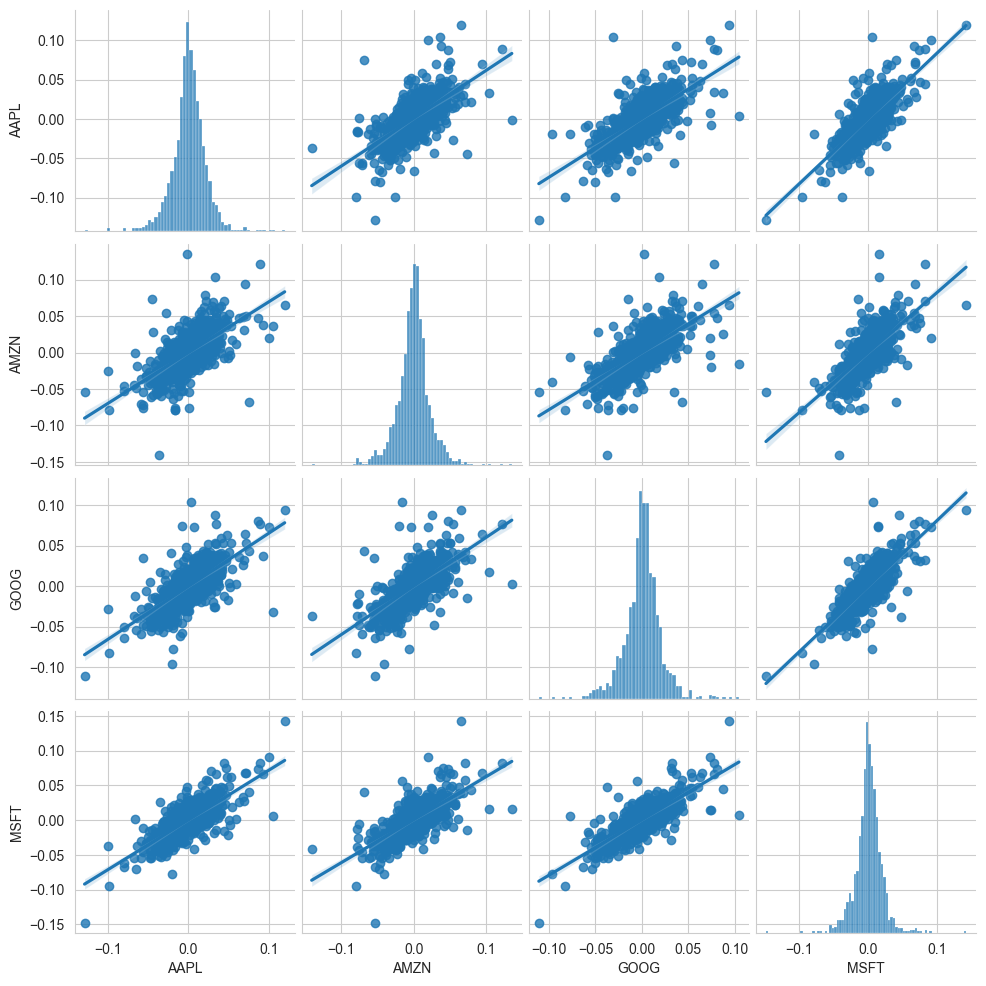

In [119]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis 
# of all the comparisons

sns.pairplot(tech_rets, kind='reg')

Above we can see all the relationships on daily returns between all the stocks. 

While the simplicity of just calling sns.pairplot() is fantastic we can also use sns.PairGrid() for full control of the figure, including what kind of plots go in the diagonal, the upper triangle, and the lower triangle. Below is an example of utilizing the full power of seaborn to achieve this result.

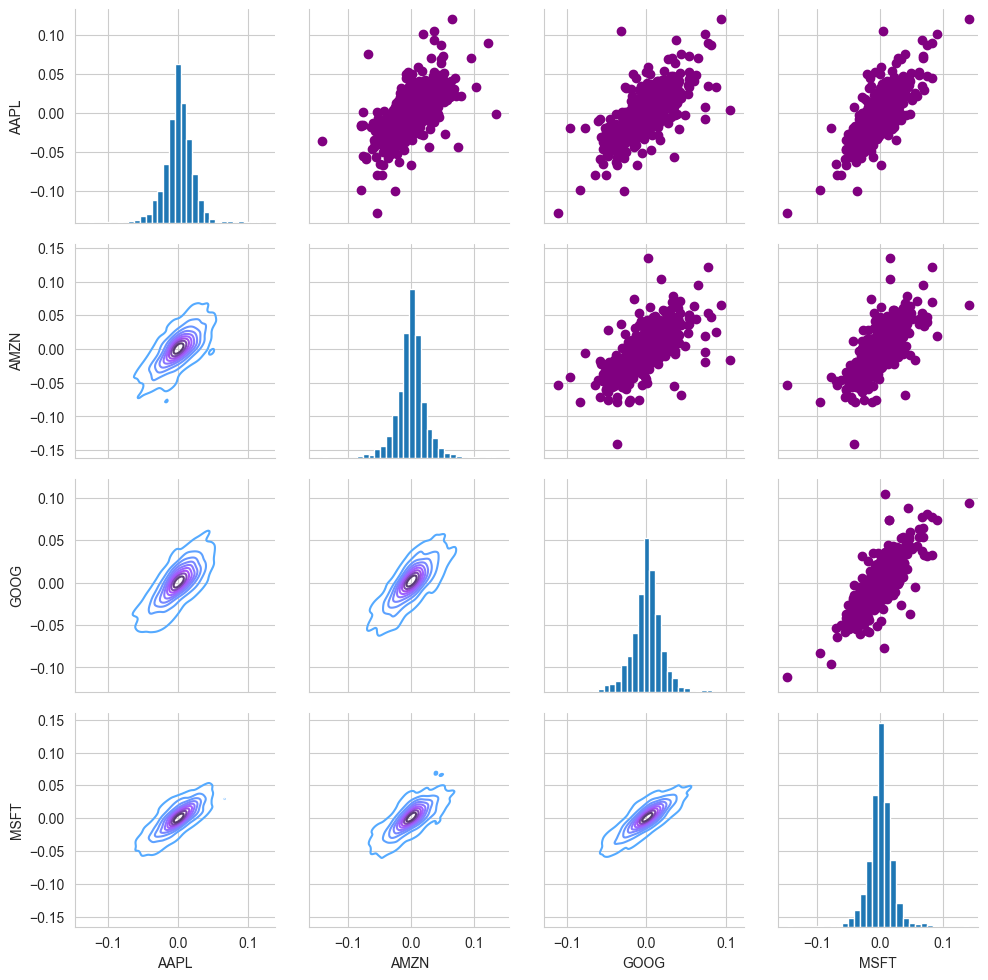

In [120]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

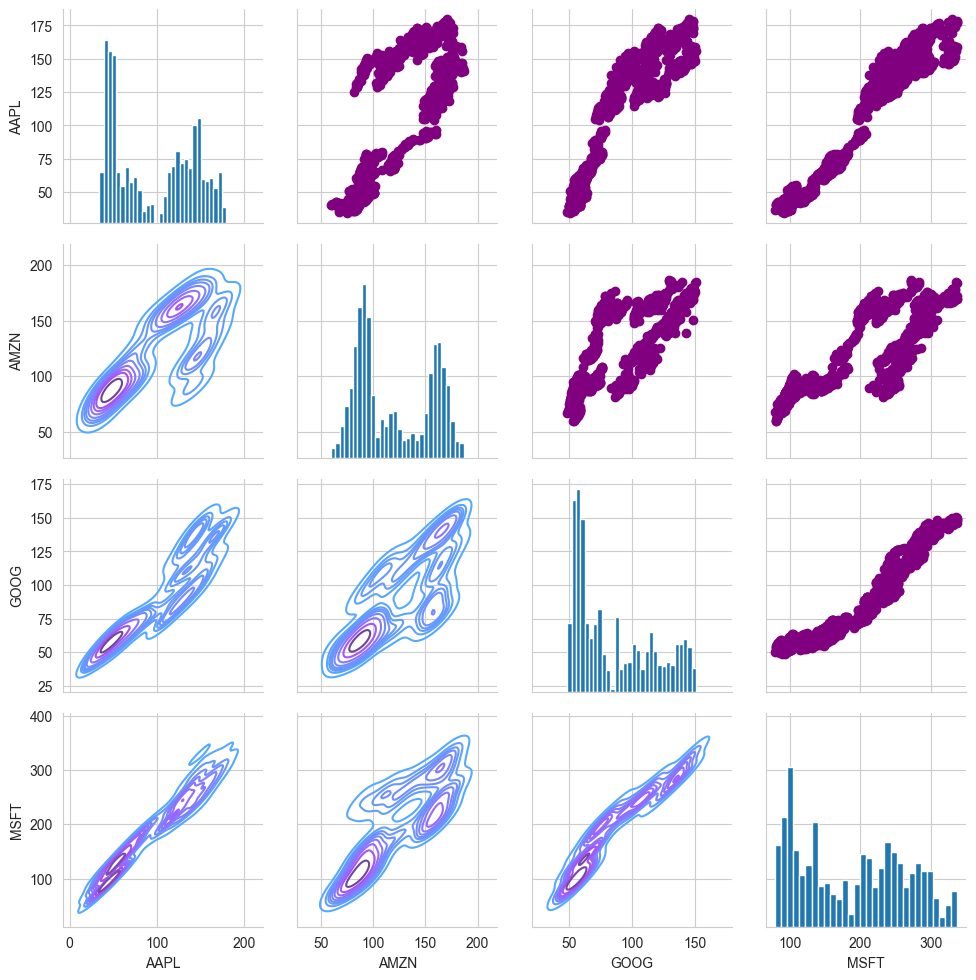

In [121]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

We could also do a correlation plot, to get actual numerical values for the correlation between the stocks' daily return values. By comparing the closing prices, we see an interesting relationship between Microsoft and Apple.

Text(0.5, 1.0, 'Correlation of stock closing price')

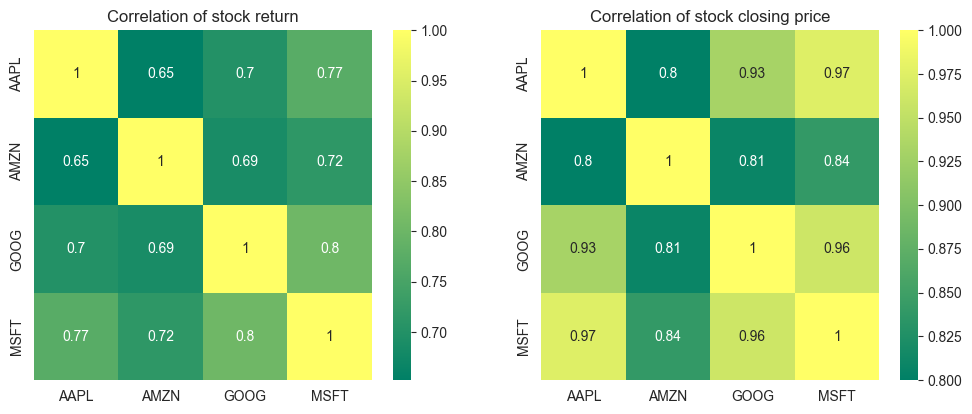

In [122]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

Just like we suspected in our PairPlot we see here numerically and visually that Microsoft and Google had the strongest correlation of daily stock return. It's also interesting to see that all the technology comapnies are positively correlated.

How much value do we put at risk by investing in a particular stock?

There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.

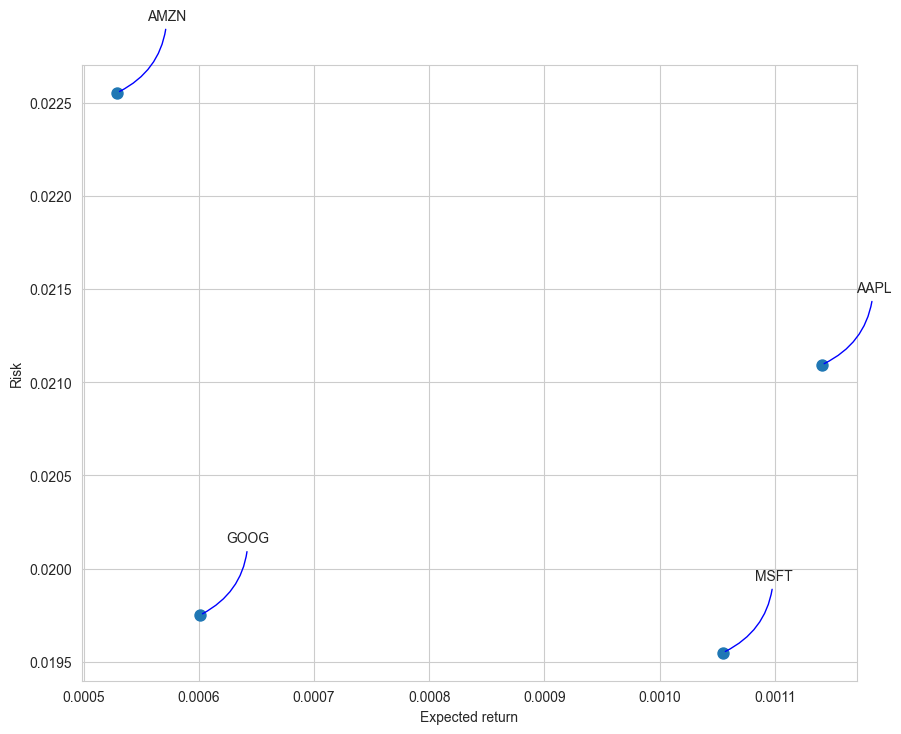

In [123]:
import numpy as np

rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

## ADDRESS

### Linear Model

*Code adapted from on https://www.kaggle.com/code/nikhilkohli/stock-prediction-using-linear-regression-starter*

In [124]:
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
import numpy as np
import seaborn as sns
import os

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.feature_selection import RFECV, SelectFromModel, SelectKBest
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
%matplotlib inline

In [200]:
# Load data
df_Stock = AAPL

df_Stock["Close Forecast"] = df_Stock["Close"].shift(-1)
df_Stock

/var/folders/d7/ktx3dym91yjgj_gpmnfs0rh00000gn/T/ipykernel_80621/3179296511.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Adj Close       Close        High         Low        Open  \
Date                                                                     
2018-01-02   40.670975   43.064999   43.075001   42.314999   42.540001   
2018-01-03   40.663887   43.057499   43.637501   42.990002   43.132500   
2018-01-04   40.852779   43.257500   43.367500   43.020000   43.134998   
2018-01-05   41.317902   43.750000   43.842499   43.262501   43.360001   
2018-01-08   41.164421   43.587502   43.902500   43.482498   43.587502   
...                ...         ...         ...         ...         ...   
2022-12-23  130.959961  131.860001  132.419998  129.639999  130.919998   
2022-12-27  129.142441  130.029999  131.410004  128.720001  131.380005   
2022-12-28  125.179680  126.040001  131.029999  125.870003  129.669998   
2022-12-29  128.725311  129.610001  130.479996  127.730003  127.989998   
2022-12-30  129.043106  129.929993  129.949997  127.430000  128.410004   

               Volume  MA for 10 days  MA for 20 days  MA for 50 days  \
Date                                                                    
2018-01-02  102223600             NaN             NaN             NaN   
2018-01-03  118071600             NaN             NaN             NaN   
2018-01-04   89738400             NaN             NaN             NaN   
2018-01-05   94640000             NaN             NaN             NaN   
2018-01-08   82271200             NaN             NaN             NaN   
...               ...             ...             ...             ...   
2022-12-23   63814900      135.904968      139.700883      143.075665   
2022-12-27   69007800      134.468837      138.996227      142.914357   
2022-12-28   85438400      132.539098      138.244889      142.593876   
2022-12-29   75703700      131.188380      137.330176      142.317735   
2022-12-30   77034200      130.535863      136.417447      142.045769   

            Daily Return  Close Forecast  
Date                                      
2018-01-02           NaN       43.057499  
2018-01-03     -0.000174       43.257500  
2018-01-04      0.004645       43.750000  
2018-01-05      0.011385       43.587502  
2018-01-08     -0.003715       43.582500  
...                  ...             ...  
2022-12-23     -0.002798      130.029999  
2022-12-27     -0.013878      126.040001  
2022-12-28     -0.030685      129.610001  
2022-12-29      0.028324      129.929993  
2022-12-30      0.002469             NaN  

[1259 rows x 11 columns]

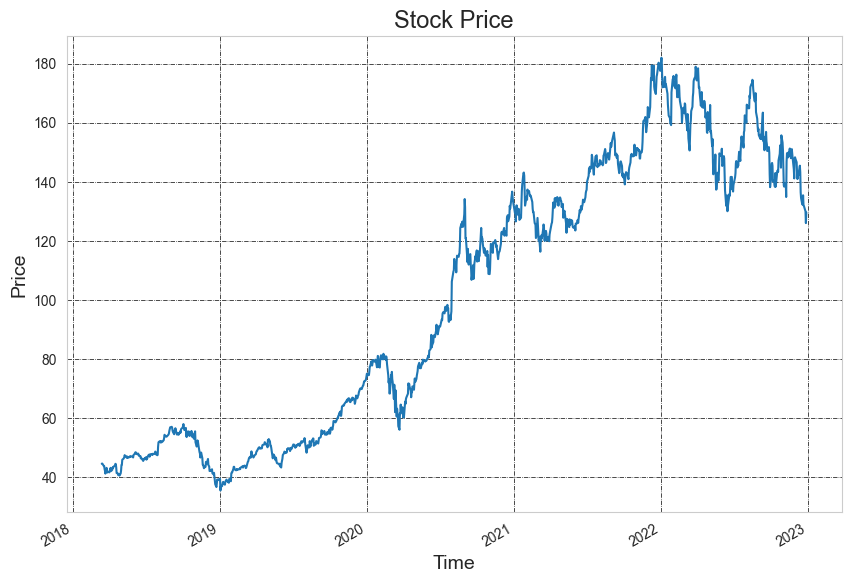

In [127]:
# Plot time series
df_Stock['Close'].plot(figsize=(10, 7))
plt.title("Stock Price", fontsize=17)
plt.ylabel('Price', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

In [128]:
# Test Train Set
def create_train_test_set(df_Stock):
    
    features = df_Stock.drop(columns=['Close Forecast'], axis=1)
    target = df_Stock['Close Forecast']
    

    data_len = df_Stock.shape[0]
    print('Historical Stock Data length is - ', str(data_len))

    #create a chronological split for train and testing
    train_split = int(data_len * 0.88)
    print('Training Set length - ', str(train_split))

    val_split = train_split + int(data_len * 0.1)
    print('Validation Set length - ', str(int(data_len * 0.1)))

    print('Test Set length - ', str(int(data_len * 0.02)))

    # Splitting features and target into train, validation and test samples 
    X_train, X_val, X_test = features[:train_split], features[train_split:val_split], features[val_split:]
    Y_train, Y_val, Y_test = target[:train_split], target[train_split:val_split], target[val_split:]

    #print shape of samples
    print(X_train.shape, X_val.shape, X_test.shape)
    print(Y_train.shape, Y_val.shape, Y_test.shape)
    
    return X_train, X_val, X_test, Y_train, Y_val, Y_test

In [129]:
X_train, X_val, X_test, Y_train, Y_val, Y_test = create_train_test_set(df_Stock)

Historical Stock Data length is -  1209
Training Set length -  1063
Validation Set length -  120
Test Set length -  24
(1063, 10) (120, 10) (26, 10)
(1063,) (120,) (26,)


In [130]:
X_train.columns

Index(['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume', 'MA for 10 days',
       'MA for 20 days', 'MA for 50 days', 'Daily Return'],
      dtype='object')

In [131]:
# Prediction using linear regression
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

In [132]:
print('LR Coefficients: \n', lr.coef_)
print('LR Intercept: \n', lr.intercept_)

LR Coefficients: 
 [ 1.07496155e-01  5.68391173e-01  3.46092409e-01  5.44974270e-01
 -5.87998872e-01  1.65352591e-09  5.01968489e-02 -3.88800296e-02
  1.26314167e-02 -1.18640422e+01]
LR Intercept: 
 0.14962648843516035


In [133]:
# Evaluation
print("Performance (R^2): ", lr.score(X_train, Y_train))

Performance (R^2):  0.9979739628343605


In [134]:
def get_mape(y_true, y_pred): 
    """
    Compute mean absolute percentage error (MAPE)
    """
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [135]:
# Predict test dataset
Y_train_pred = lr.predict(X_train)
Y_val_pred = lr.predict(X_val)
Y_test_pred = lr.predict(X_test)

In [136]:
print("Training R-squared: ",round(metrics.r2_score(Y_train,Y_train_pred),2))
print("Training Explained Variation: ",round(metrics.explained_variance_score(Y_train,Y_train_pred),2))
print('Training MAPE:', round(get_mape(Y_train,Y_train_pred), 2)) 
print('Training Mean Squared Error:', round(metrics.mean_squared_error(Y_train,Y_train_pred), 2)) 
print("Training RMSE: ",round(np.sqrt(metrics.mean_squared_error(Y_train,Y_train_pred)),2))
print("Training MAE: ",round(metrics.mean_absolute_error(Y_train,Y_train_pred),2))

print(' ')

print("Validation R-squared: ",round(metrics.r2_score(Y_val,Y_val_pred),2))
print("Validation Explained Variation: ",round(metrics.explained_variance_score(Y_val,Y_val_pred),2))
print('Validation MAPE:', round(get_mape(Y_val,Y_val_pred), 2)) 
print('Validation Mean Squared Error:', round(metrics.mean_squared_error(Y_train,Y_train_pred), 2)) 
print("Validation RMSE: ",round(np.sqrt(metrics.mean_squared_error(Y_val,Y_val_pred)),2))
print("Validation MAE: ",round(metrics.mean_absolute_error(Y_val,Y_val_pred),2))

print(' ')

print("Test R-squared: ",round(metrics.r2_score(Y_test,Y_test_pred),2))
print("Test Explained Variation: ",round(metrics.explained_variance_score(Y_test,Y_test_pred),2))
print('Test MAPE:', round(get_mape(Y_test,Y_test_pred), 2)) 
print('Test Mean Squared Error:', round(metrics.mean_squared_error(Y_test,Y_test_pred), 2)) 
print("Test RMSE: ",round(np.sqrt(metrics.mean_squared_error(Y_test,Y_test_pred)),2))
print("Test MAE: ",round(metrics.mean_absolute_error(Y_test,Y_test_pred),2))

Training R-squared:  1.0
Training Explained Variation:  1.0
Training MAPE: 1.47
Training Mean Squared Error: 4.08
Training RMSE:  2.02
Training MAE:  1.37
 
Validation R-squared:  0.89
Validation Explained Variation:  0.89
Validation MAPE: 1.79
Validation Mean Squared Error: 4.08
Validation RMSE:  3.43
Validation MAE:  2.66
 
Test R-squared:  0.83
Test Explained Variation:  0.84
Test MAPE: 1.7
Test Mean Squared Error: 8.96
Test RMSE:  2.99
Test MAE:  2.36


In [137]:
df_pred = pd.DataFrame(Y_val.values, columns=['Actual'], index=Y_val.index)
df_pred['Predicted'] = Y_val_pred
df_pred = df_pred.reset_index()
df_pred.loc[:, 'Date'] = pd.to_datetime(df_pred['Date'],format='%Y-%m-%d')
df_pred["Residuals"] = df_pred["Predicted"] - df_pred["Actual"]
df_pred

Date      Actual   Predicted  Residuals
0   2022-06-02  145.380005  151.085742   5.705737
1   2022-06-03  146.139999  145.987235  -0.152765
2   2022-06-06  148.710007  146.380602  -2.329404
3   2022-06-07  147.960007  149.278548   1.318542
4   2022-06-08  142.639999  148.706499   6.066499
..         ...         ...         ...        ...
115 2022-11-15  148.789993  149.412644   0.622651
116 2022-11-16  150.720001  148.611509  -2.108492
117 2022-11-17  151.289993  151.256799  -0.033194
118 2022-11-18  148.009995  150.842737   2.832742
119 2022-11-21  150.179993  148.179109  -2.000883

[120 rows x 4 columns]

<Axes: >

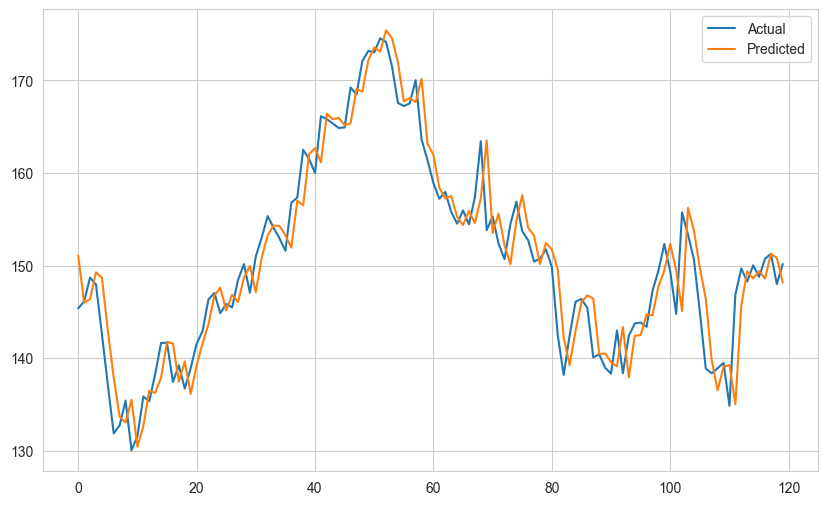

In [138]:
# Plot predicted vs actual
df_pred[['Actual', 'Predicted']].plot()

<Axes: >

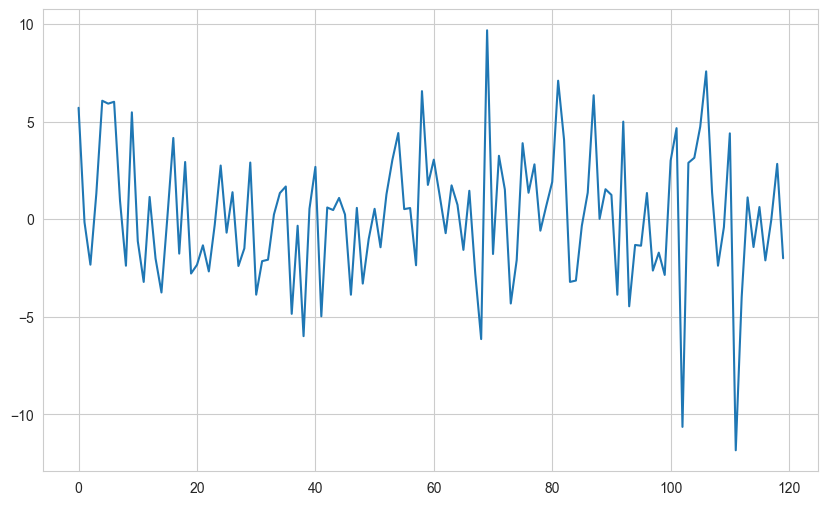

In [139]:
df_pred["Residuals"].plot()

Not very good... Todo: improve

### ARIMA Model

*Code adapted from https://www.kaggle.com/code/nageshsingh/stock-market-forecasting-arima/notebook*

Kernel density estimation (KDE) is a non-parametric way to estimate the PDF of a random variable.

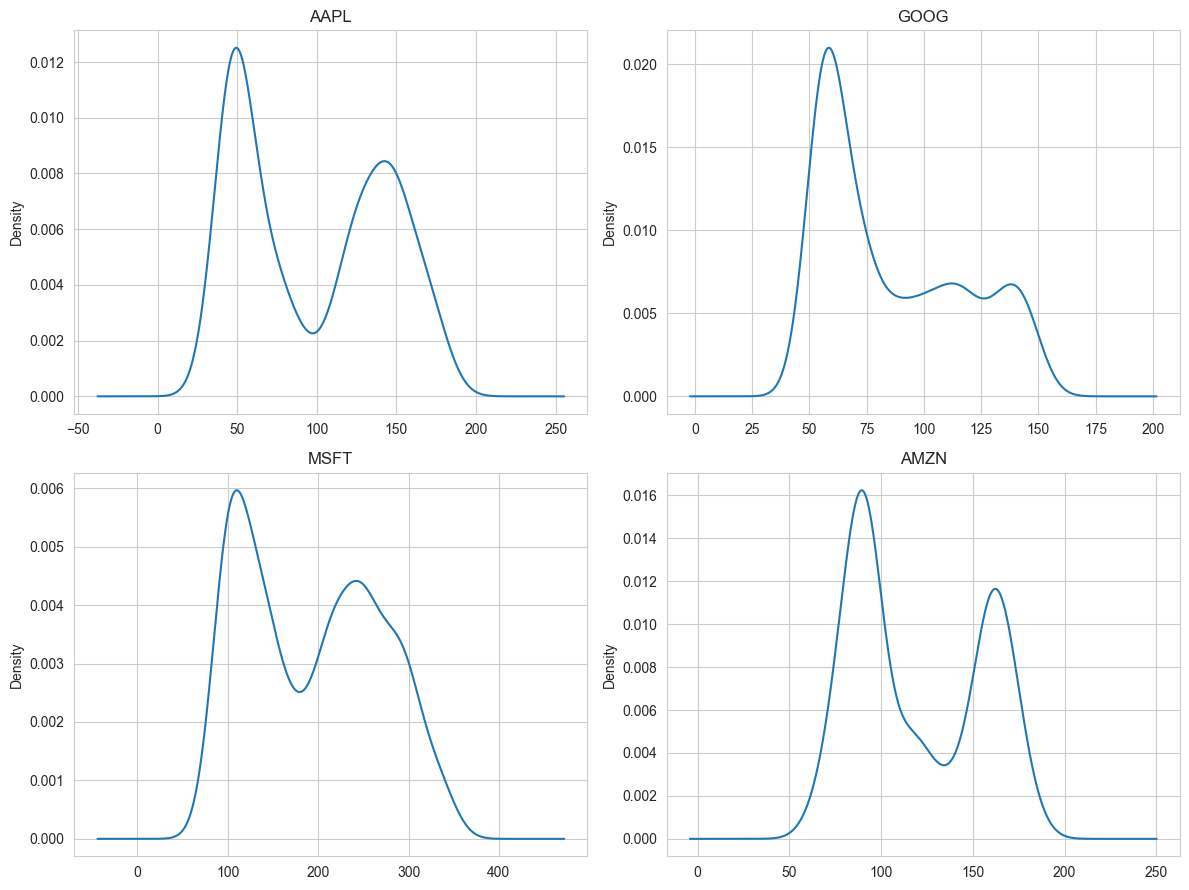

In [140]:
plt.figure(figsize=(12, 9))
for i, company in enumerate(company_list):
    plt.subplot(2, 2, i+1)
    company['Close'].plot(kind="kde")
    plt.ylabel('Density')
    plt.title(f"{stock_list[i]}")
    
plt.tight_layout()

Given a time series, it is thought to consist of 3 systematic components:
1. Level: average value in series
2. Trend: increasing or decreasing value in the series
3. Seasonality: the repeating short-term cycle in the series
And 1 non-systematic component:
1. Noise: random variation in the series

Time series analysis only works with stationary data so we must first check that with the ADF (Augmented Dickey-Fuller) test.

DF is a popular statistical test used to determine the presence of unit root in the series (hence help us understand if the series is stationary or not).

- Null hypothesis: series has unit root (value of $a=1$)
- Alternate hypothesis: series has no unit root

If we fail to reject the null hypothesis, we can say the series is non-stationary. This means the series is linear or difference stationary. If both mean and standard deviation are flat lines (i.e. const. mean and const. variance), the series becomes stationary.

In [141]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Test for staionarity
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)


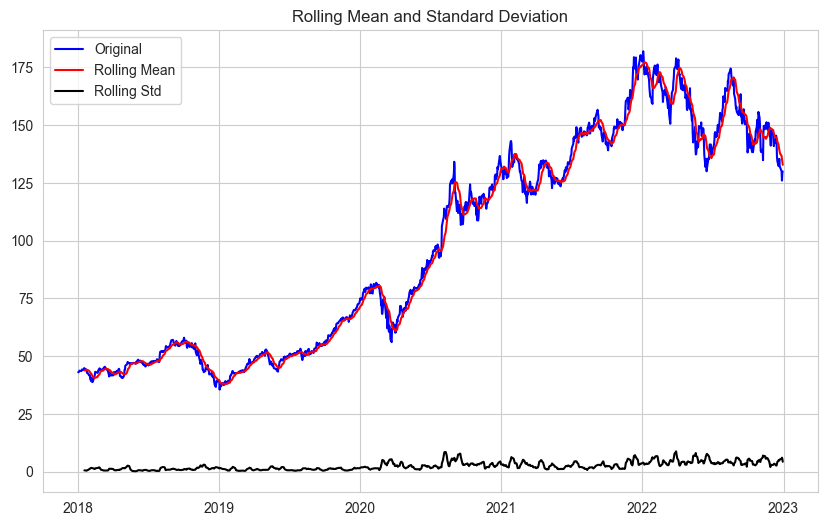

Results of dickey fuller test
Test Statistics                  -1.073951
p-value                           0.725347
No. of lags used                 11.000000
Number of observations used    1247.000000
critical value (1%)              -3.435605
critical value (5%)              -2.863861
critical value (10%)             -2.568005
dtype: float64


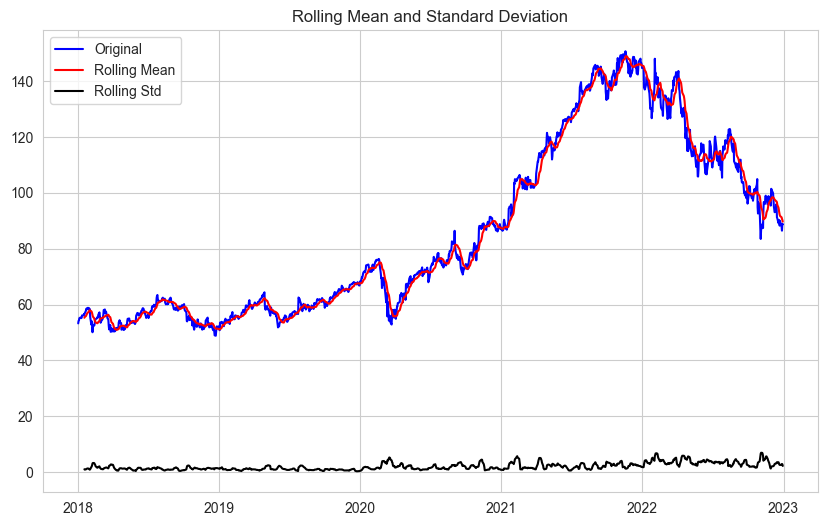

Results of dickey fuller test
Test Statistics                  -1.210835
p-value                           0.668918
No. of lags used                  1.000000
Number of observations used    1257.000000
critical value (1%)              -3.435563
critical value (5%)              -2.863842
critical value (10%)             -2.567996
dtype: float64


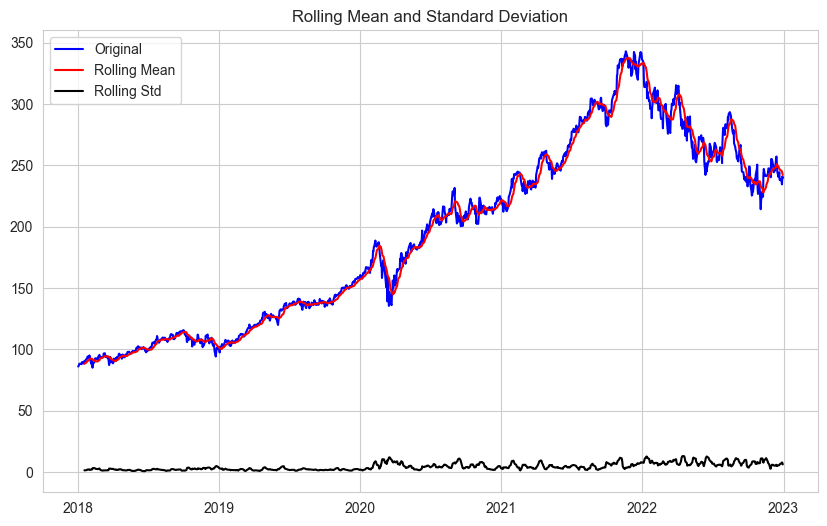

Results of dickey fuller test
Test Statistics                  -1.309322
p-value                           0.624897
No. of lags used                  9.000000
Number of observations used    1249.000000
critical value (1%)              -3.435596
critical value (5%)              -2.863857
critical value (10%)             -2.568004
dtype: float64


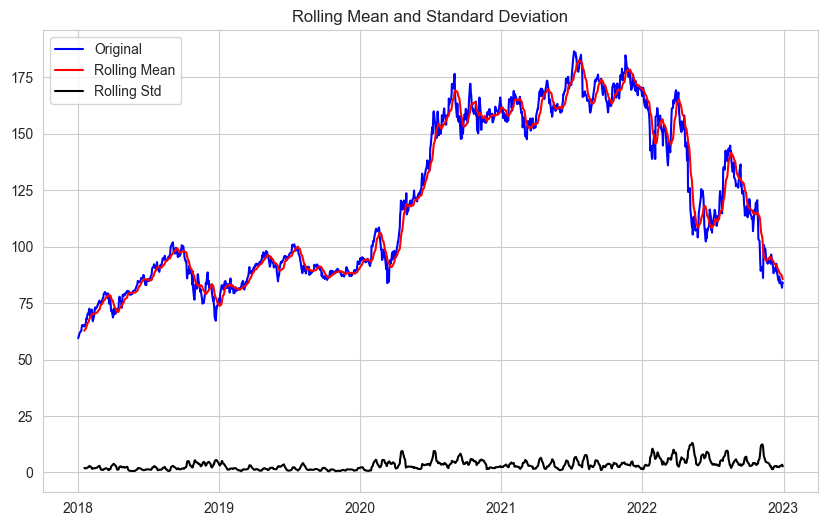

Results of dickey fuller test
Test Statistics                  -1.705438
p-value                           0.428313
No. of lags used                  0.000000
Number of observations used    1258.000000
critical value (1%)              -3.435559
critical value (5%)              -2.863840
critical value (10%)             -2.567995
dtype: float64


In [142]:
for i, company in enumerate(company_list):
    test_stationarity(company["Close"])

For all companies, p-value is greater than 0.05 so we cannot reject the Null hypothesis (with 5% significance). Also, test statistic is greater than the critical values so data is non-stationary.

So let's separate Trend and Seasonality from the time series.

For now, let's focus on AAPL stock

In [185]:
df_close = AAPL.reset_index().Close

<Figure size 1000x600 with 0 Axes>

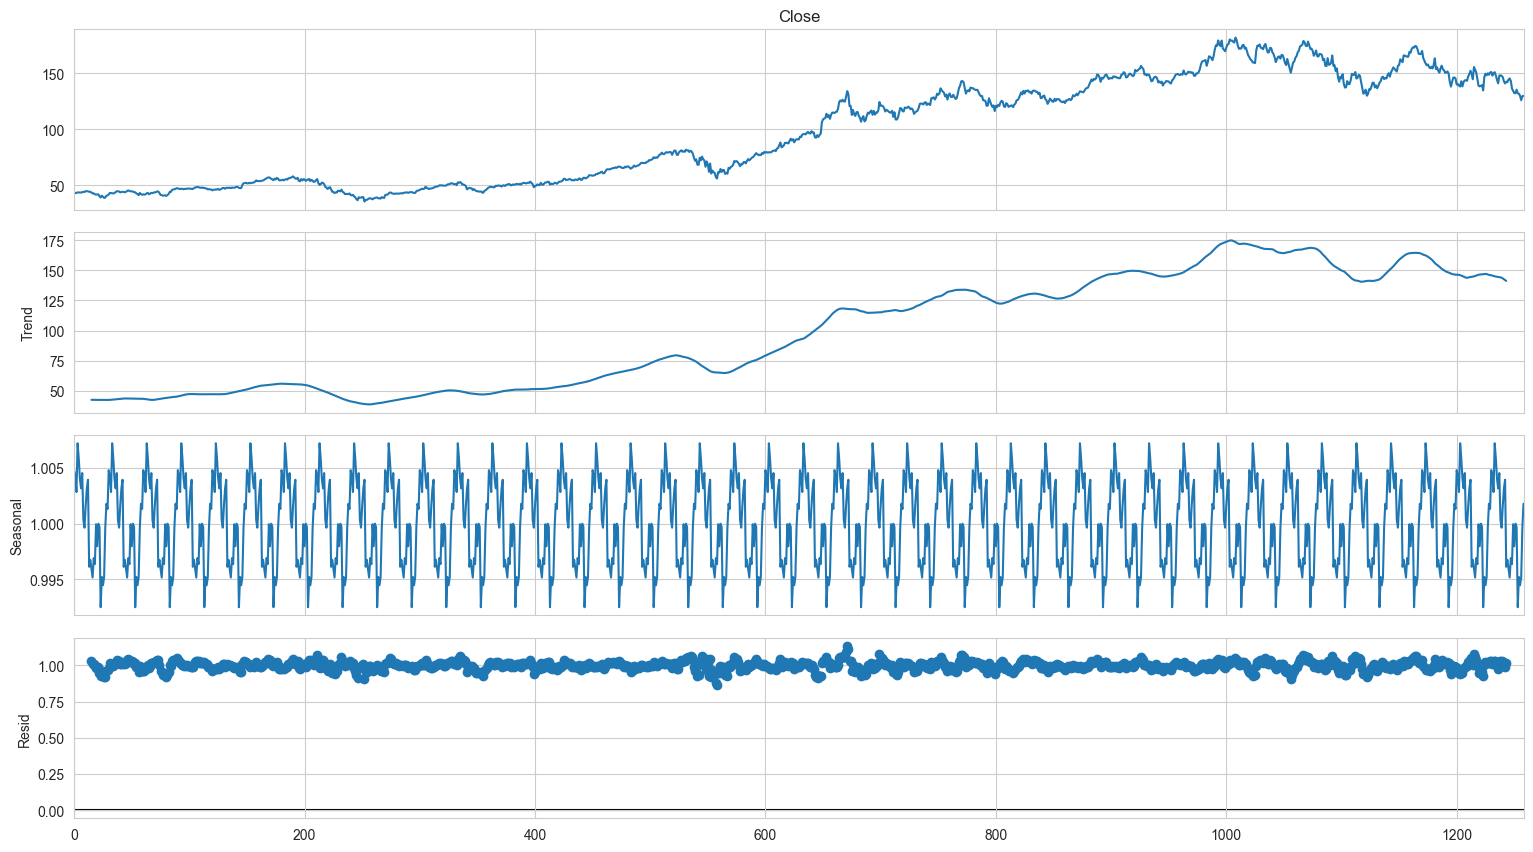

In [186]:
from statsmodels.tsa.seasonal import seasonal_decompose

#To separate the trend and the seasonality from a time series, 
# we can decompose the series using the following code.
result = seasonal_decompose(df_close, model='multiplicative', period=30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


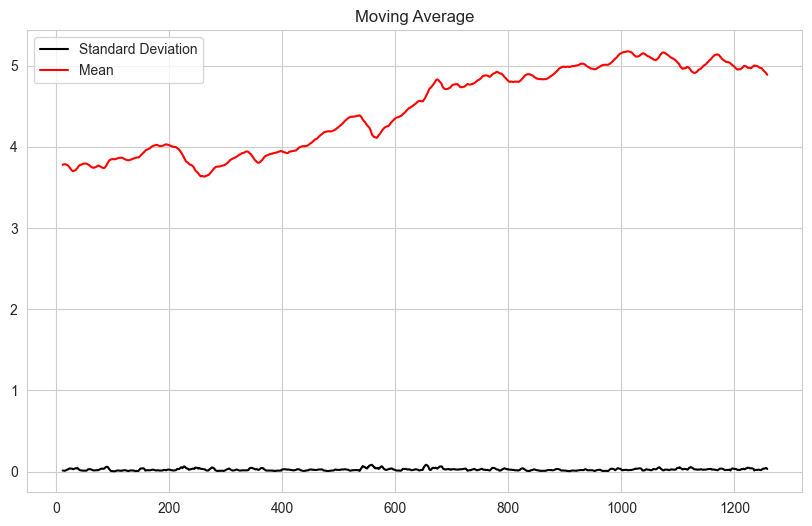

In [187]:
#if not stationary then eliminate trend
#Eliminate trend
import numpy as np
from pylab import rcParams

rcParams['figure.figsize'] = 10, 6
df_log = np.log(df_close)
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()

Now we create the ARIMA model

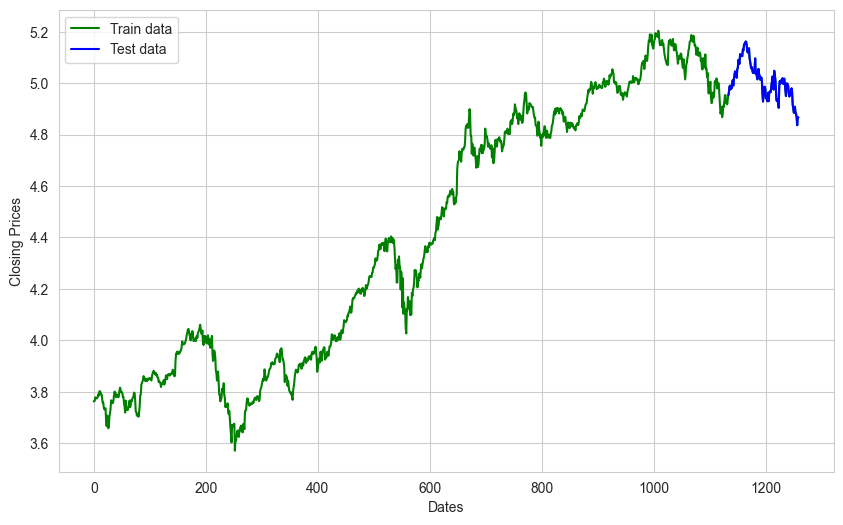

In [188]:
#split data into train and training set
df_log = df_log
train_data, test_data = df_log[3:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_log, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

For our ARIMA model, we need to choose $p,q,d$. We can do so manually by observing the plots of ACF and PACF but we can instead use Auto ARIMA to get the best parameters without having to plot these graphs.

`auto_arima` seeks optimal parameters and returns a fitted ARIMA model. Works by conducting differencing tests (i.e. Kwiatkowski-Phillips-Schmidt-Shin, Augmented Dickey-Fuller or Phillips-Perron) to detereming the order of differencing, $d$, and then fitting models within ranges of defined `start_p`, `max_p`, `start_q`, `max_q` ranges. If seasonal optional is enabled, `auto_arima` also seeks to identify the optimal P and Q hyperparameters after conducting the Canova-Hansen test to determine the optimal order of seasonal differencing D.

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-5522.210, Time=0.37 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-5516.683, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-5531.209, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-5530.843, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-5516.001, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-5529.245, Time=0.12 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-5529.257, Time=0.11 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-5527.234, Time=0.20 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-5529.808, Time=0.02 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0] intercept
Total fit time: 1.064 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1130
Model:               SARIMAX(1, 1, 0)   Log Likelihood                2768.604
Date:                Mon, 12 Feb 2024   

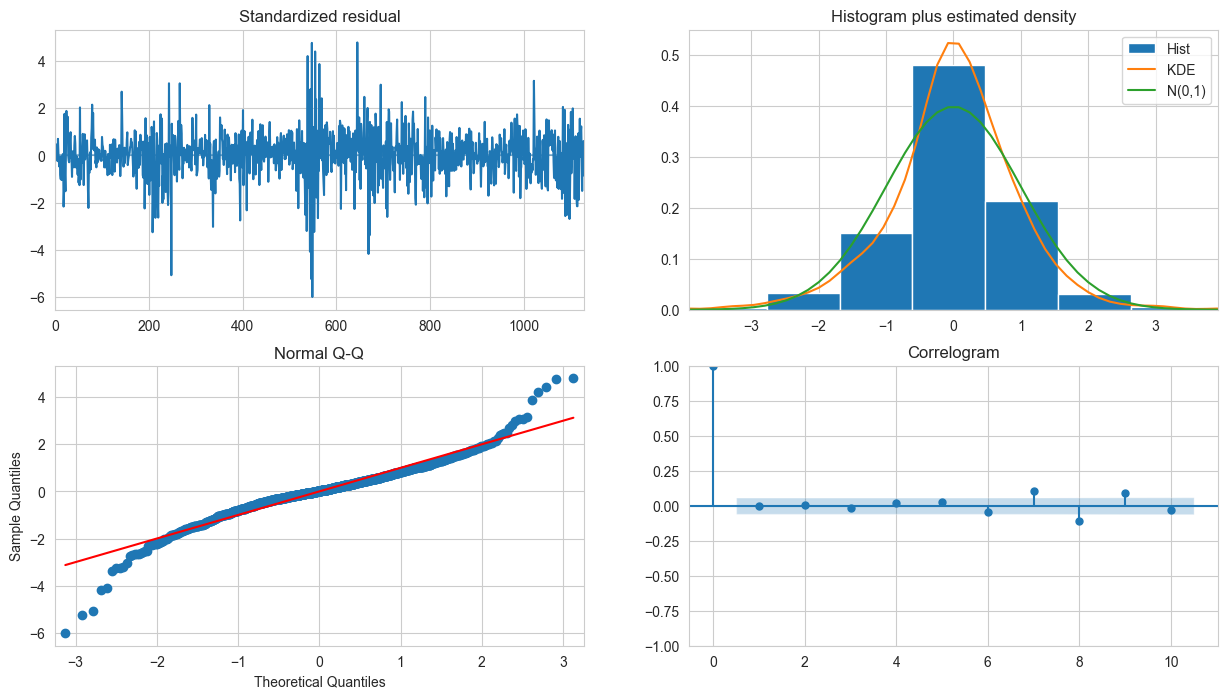

In [189]:
from pmdarima.arima import auto_arima

model_autoARIMA = auto_arima(train_data,
                      start_p=2,
                      start_q=2,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=5,
                      max_q=5,
                      max_d=2,
                      m=1,             # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0,           # order of seasonal differencing, auto 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()


How do we interpret the plots? (Todo: verify)
- Top left: residual errors seem to fluctuate around mean of zero and have uniform variance?
- Top right: suggests a normal distribution with mean zero
- Bottom left: all dots should fall on red line. Significant deviations implies distribution is skewed.
- Bottom right: The Correlogram, aka ACF plot, shows residula errors are not autocorrelated. Autocorrelation implies there is some pattern in residual errors which are not explained in the model (so we will need to look for more predictors to the model).

Overal seems to be a good fit, so create our ARIMA model with these parameters: `p,d,q=0,1,1`.

In [190]:
from statsmodels.tsa.arima.model import ARIMA

#Modeling
# Build Model
model = ARIMA(train_data, order=(2,2,1))  
fitted = model.fit() 
print(fitted.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1130
Model:                 ARIMA(2, 2, 1)   Log Likelihood                2761.994
Date:                Mon, 12 Feb 2024   AIC                          -5515.988
Time:                        11:52:32   BIC                          -5495.875
Sample:                             0   HQIC                         -5508.389
                               - 1130                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1177      0.020     -5.882      0.000      -0.157      -0.078
ar.L2          0.0079      0.019      0.422      0.673      -0.029       0.044
ma.L1         -0.9985      0.005   -196.570      0.0

Now let's forecast stock prices on test, keeping 95% confidence level.

In [191]:
# Obtain forecast
forecast_result = fitted.get_forecast(steps=len(test_data))

# Get the forecasted values
fc = forecast_result.predicted_mean

# Get the standard error
se = forecast_result.se_mean

# Get the confidence intervals
conf = forecast_result.conf_int(alpha=0.05)


In [192]:
# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)
lower_series = pd.Series(conf['lower Close'], index=test_data.index)
upper_series = pd.Series(conf['upper Close'], index=test_data.index)

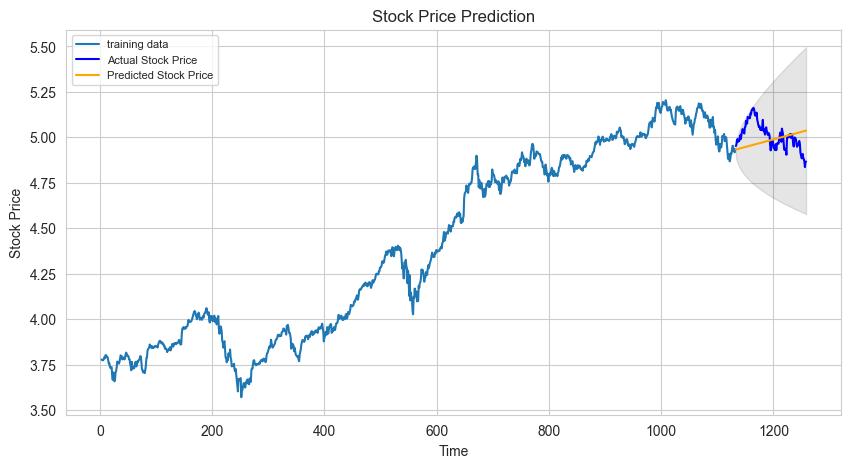

In [193]:
# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training data')
plt.plot(test_data, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [194]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

# report performance
mse = mean_squared_error(test_data, fc)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data, fc)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data, fc))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc - test_data)/np.abs(test_data))
print('MAPE: '+str(mape))


MSE: 0.009197078949204155
MAE: 0.07723920554534287
RMSE: 0.09590140222751779
MAPE: 0.015371375423643453


Next steps: Create an ARIMA based trading strategy and analyse the strategy performance
Now, you can create an ARIMA based trading strategy using the predictions made.
After the strategy is created, you can analyse the performance of the strategy.
The output will give you Sharpe Ratio, cumulative return and the maximum drawdown.
The strategy performance will look like this as the plotted graph.

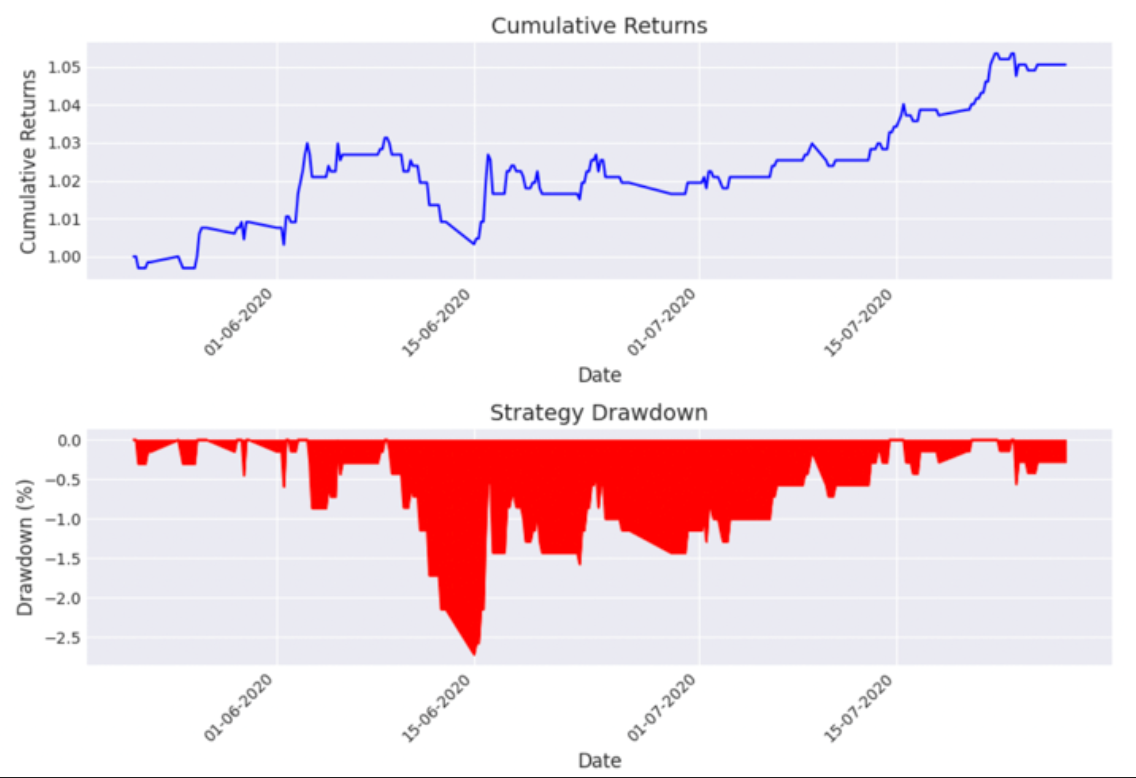

Pros of using ARIMA model in trading
- Captures Time-dependent Patterns: The ARIMA model is effective at capturing trends, seasonality, and other temporal patterns in time series data, providing valuable insights into market behaviour.
- Proven Methodology: ARIMA is a well-established and widely used modelling technique in time series analysis, with a solid foundation in statistics. It has been successfully applied in various domains, including trading.
- Interpretability: ARIMA models provide interpretable results, allowing traders to understand the relationship between past and future price movements and make informed decisions based on the model's coefficients and statistical measures.
- Handles Non-stationarity: The ARIMA model's integration component (the "I" in ARIMA) helps transform non-stationary data into stationary form, addressing one of the challenges often encountered in financial time series analysis.

Cons of using ARIMA model in trading
- Limited Complexity: ARIMA models assume linear relationships and may struggle to capture complex or nonlinear patterns in financial markets. They might not fully capture sudden changes or rare events that can significantly impact prices.
- Data Quality and Assumptions: ARIMA models require high-quality data and rely on assumptions such as stationarity and normality. Violations of these assumptions can affect the model's accuracy and reliability.
- Limited Incorporation of External Factors: ARIMA models primarily focus on historical price data and may not readily incorporate external factors such as news events, economic indicators, or market sentiment that can influence price movements.
- Short-term Focus: ARIMA models tend to be better suited for short-term forecasting rather than long-term predictions. They may struggle to capture longer-term trends or shifts in market dynamics.


(From https://blog.quantinsti.com/forecasting-stock-returns-using-arima-model/)


### LSTM Network

*Code adapted from https://www.kaggle.com/code/faressayah/stock-market-analysis-prediction-using-lstm*

Predicting close price of AAPL...

In [ ]:
from datetime import datetime
# Get the stock quote
df = AAPL
# Show teh data
df.head()

Adj Close      Close       High        Low       Open     Volume  \
Date                                                                           
2018-01-02  40.670975  43.064999  43.075001  42.314999  42.540001  102223600   
2018-01-03  40.663887  43.057499  43.637501  42.990002  43.132500  118071600   
2018-01-04  40.852779  43.257500  43.367500  43.020000  43.134998   89738400   
2018-01-05  41.317902  43.750000  43.842499  43.262501  43.360001   94640000   
2018-01-08  41.164421  43.587502  43.902500  43.482498  43.587502   82271200   

            MA for 10 days  MA for 20 days  MA for 50 days  Daily Return  \
Date                                                                       
2018-01-02             NaN             NaN             NaN           NaN   
2018-01-03             NaN             NaN             NaN     -0.000174   
2018-01-04             NaN             NaN             NaN      0.004645   
2018-01-05             NaN             NaN             NaN      0.011385   
2018-01-08             NaN             NaN             NaN     -0.003715   

            Close Forecast  
Date                        
2018-01-02       43.057499  
2018-01-03       43.257500  
2018-01-04       43.750000  
2018-01-05       43.587502  
2018-01-08       43.582500

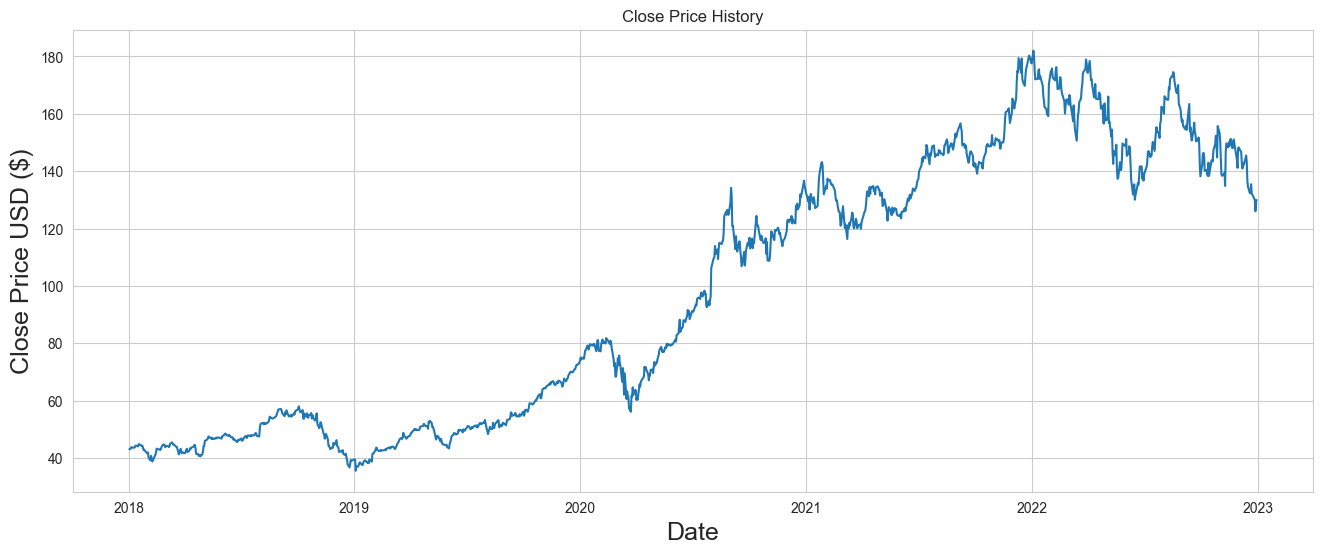

In [ ]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [ ]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values

In [ ]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data


array([[0.05132712],
       [0.05127591],
       [0.05264146],
       ...,
       [0.61785443],
       [0.64222927],
       [0.64441407]])

In [ ]:
# Create the training data set 
# Create the scaled training data set
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .9 ))
train_data = scaled_data[0:int(training_data_len), :]

# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i])
    y_train.append(train_data[i])
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape, y_train.shape

((1074, 60, 1), (1074, 1))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1074/1074 [==============================] - 23s 20ms/step - loss: 0.0029


In [ ]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

4/4 [==============================] - 0s 15ms/step


5.251552632301554

/var/folders/d7/ktx3dym91yjgj_gpmnfs0rh00000gn/T/ipykernel_80621/637757777.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


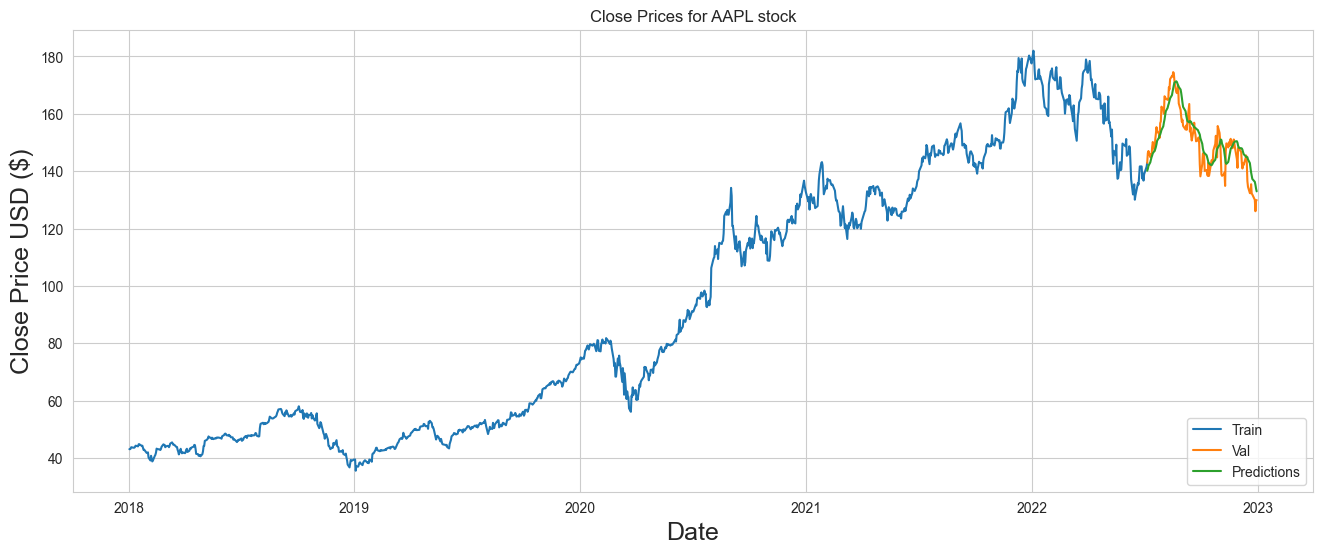

In [ ]:
# Plot the data
train = data[:training_data_len+1]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Close Prices for AAPL stock')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
import plotly.graph_objects as go
import plotly.express as px

# Create traces
trace1 = go.Scatter(x=train.index, y=train['Close'], mode='lines', name='Train')
trace2 = go.Scatter(x=valid.index, y=valid['Close'], mode='lines', name='Validation')
trace3 = go.Scatter(x=valid.index, y=valid['Predictions'], mode='lines', name='Predictions')

# Layout
layout = go.Layout(title='Close Prices for AAPL stock',
                   xaxis=dict(title='Date'),
                   yaxis=dict(title='Close Price USD ($)'))

# Figure
fig = go.Figure(data=[trace1, trace2, trace3], layout=layout)

# Show plot
fig.show()


In [ ]:
# Calculate residuals
valid['Residuals'] = valid['Close'] - valid['Predictions']

# Create a trace for residuals
trace_res = go.Scatter(x=valid.index, y=valid['Residuals'], mode='lines+markers', name='Residuals')

# Layout
layout_res = go.Layout(title='Residuals of AAPL Stock Predictions',
                       xaxis=dict(title='Date'),
                       yaxis=dict(title='Residuals'))

# Figure
fig_res = go.Figure(data=[trace_res], layout=layout_res)

# Show plot
fig_res.show()


/var/folders/d7/ktx3dym91yjgj_gpmnfs0rh00000gn/T/ipykernel_80621/720964869.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
valid['Prev Day Close'] = valid['Close'].shift(1)
valid['Control Residuals'] = valid['Close'] - valid['Prev Day Close']

# Create a trace for residuals
trace_res = go.Scatter(x=valid.index, y=valid['Residuals'], mode='lines+markers', name='Residuals')

# Layout
layout_res = go.Layout(title='Residuals of AAPL Stock Predictions',
                       xaxis=dict(title='Date'),
                       yaxis=dict(title='Residuals'))

# Figure
fig_res = go.Figure(data=[trace_res], layout=layout_res)

# Show plot
fig_res.show()

/var/folders/d7/ktx3dym91yjgj_gpmnfs0rh00000gn/T/ipykernel_80621/1212904369.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/d7/ktx3dym91yjgj_gpmnfs0rh00000gn/T/ipykernel_80621/1212904369.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((valid["Predictions"] - valid["Close"]) ** 2)))
rmse

5.251552632301554

In [ ]:
# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((valid["Prev Day Close"] - valid["Close"]) ** 2)))
rmse

3.3193231717410665

In [ ]:
# Show the valid and predicted prices
valid

Close  Predictions  Residuals  Prev Day Close  \
Date                                                             
2022-07-06  142.919998   140.150436   2.769562             NaN   
2022-07-07  146.350006   140.803528   5.546478      142.919998   
2022-07-08  147.039993   141.861740   5.178253      146.350006   
2022-07-11  144.869995   143.085739   1.784256      147.039993   
2022-07-12  145.860001   144.040955   1.819046      144.869995   
...                ...          ...        ...             ...   
2022-12-23  131.860001   137.292099  -5.432098      132.229996   
2022-12-27  130.029999   136.294052  -6.264053      131.860001   
2022-12-28  126.040001   135.276337  -9.236336      130.029999   
2022-12-29  129.610001   133.947098  -4.337097      126.040001   
2022-12-30  129.929993   132.972656  -3.042664      129.610001   

            Control Residuals  
Date                           
2022-07-06                NaN  
2022-07-07           3.430008  
2022-07-08           0.689987  
2022-07-11          -2.169998  
2022-07-12           0.990005  
...                       ...  
2022-12-23          -0.369995  
2022-12-27          -1.830002  
2022-12-28          -3.989998  
2022-12-29           3.570000  
2022-12-30           0.319992  

[125 rows x 5 columns]